In [1]:
import numpy as np
import scipy as sp
import numpy.random as rm
import matplotlib.pyplot as plt
import pandas as pd

This simple code create a collection of *1-d* arrays of 0 and 1 representing realization of a random stochastic process which describe the structure of a porous material with given porosity $ \phi_{i} $, with $ i = \{0,1\}$ respectively the void phase, of volume $ V_0$, and solid phase, of volume $ V_1 = V - V_0$ .
The distribution recall the values of an indicator function for an hetereogeneous material:

$$
I^{(i)}(x) =
\left\{
	\begin{array}{ll}
		1  & \mbox{if } x \in  V_{i} \\
		0 & \mbox{otherwise }
	\end{array}
\right.
$$


The 1-point correllation  for this system have the following properties: $$ S^{i}_1 = \big \langle{I^{(i)}(x)} \big  \rangle = P \Big\{ {I^{(i)}(x) = 1} \Big\}$$

Source: *Torquato, Salvatore, and H. W. Haslach Jr. "Random heterogeneous materials: microstructure and macroscopic properties." Appl. Mech. Rev. 55.4 (2002): B62-B63.*

In [2]:
#number of points
x = 50

# number of realizations of the random process
# the greater the more accurate !
row = 1000

# porosity == void fraction == probability of phase 0
phi_0 = 0.83


In [5]:
# Random process matrix dimensions(row,x)
m = rm.choice(2,(row,x),p=[phi_0,1-phi_0])

# mean of each array == porosity of each realization
row_mean = np.mean(m,1)
mean_of_means = np.mean(row_mean)

# Global mean == Ensamble mean 
ens_mean = np.mean(m)

# Mean by x-position
x_mean = np.mean(m,0)
x_mean_df = pd.DataFrame(x_mean,columns={'x-mean'})
x_mean_df.index.name = 'x-position'

# % of null array
n_zero, = np.where((m == np.zeros(x)).all(axis=1))
perc_null = n_zero.shape[0]/m.shape[0] * 100

### Results

In [6]:
# Print the results
print('Ensable mean is =','{:.3f}'.format(ens_mean))
print('Average of means of each row:', '{:.3f}'.format(mean_of_means))
print('The two means coincide --> Ergodic system')
print('\n')

# first n-th positions
nth = 15
print('Means by x-position (first', nth,'positions, out of', x,')')
print(x_mean_df.iloc[:nth,:])

print('\nThe percentage of null arrays is =',perc_null,'%')


Ensable mean is = 0.172
Average of means of each row: 0.172
The two means coincide --> Ergodic system


Means by x-position (first 15 positions, out of 50 )
            x-mean
x-position        
0            0.155
1            0.159
2            0.198
3            0.156
4            0.183
5            0.191
6            0.177
7            0.171
8            0.155
9            0.179
10           0.183
11           0.165
12           0.157
13           0.169
14           0.162

The percentage of null arrays is = 0.0 %


### Row means distribution in the matrix
How the porosity value for each realization is differently distributed in the matrix

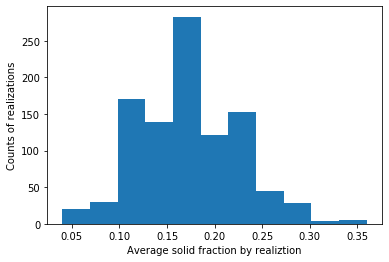

In [9]:
# number of beans in the histogram (Sturges' formula)
n_bins = int(np.rint(np.log2(row_mean.shape[0]) + 1))
# histogram
histogram = plt.hist(row_mean,bins=n_bins)
x_lab = plt.xlabel('Average solid fraction by realiztion')
y_lab = plt.ylabel('Counts of realizations')
